### Logistic Regression

In [101]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklean stuff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve, auc, roc_curve

In [2]:
# read in the data
df = pd.read_csv('./dataset/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

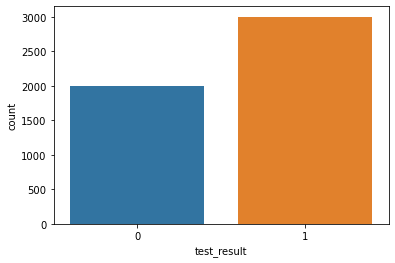

In [8]:
sns.countplot(data = df, x = 'test_result')

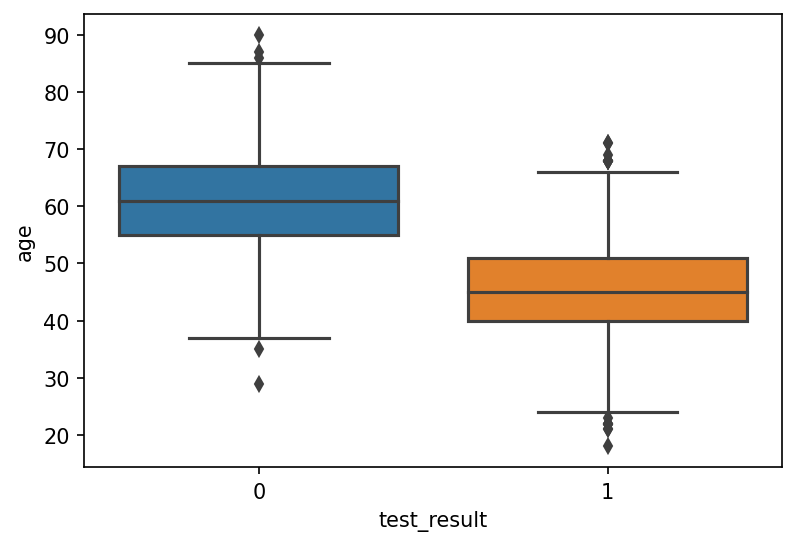

In [10]:
plt.figure(dpi = 150)
sns.boxplot(x='test_result', y = 'age', data = df);

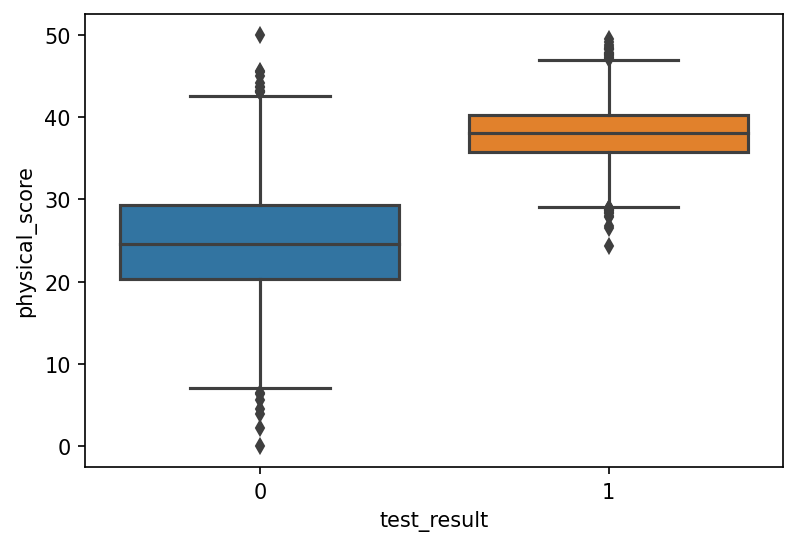

In [11]:
plt.figure(dpi = 150)
sns.boxplot(x='test_result', y = 'physical_score', data = df);

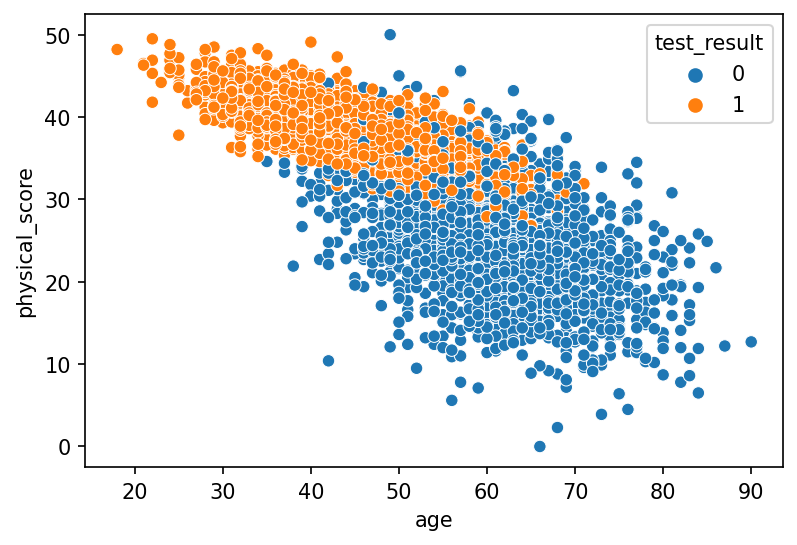

In [15]:
plt.figure(dpi = 150)
sns.scatterplot(x='age', y = 'physical_score', data = df, hue = 'test_result')

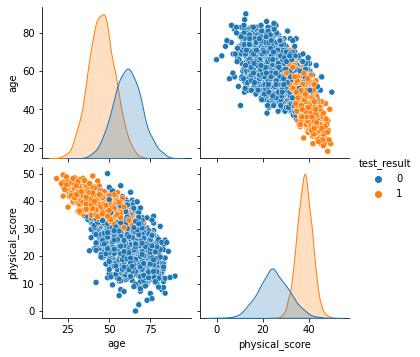

In [16]:
sns.pairplot(df, hue = 'test_result')

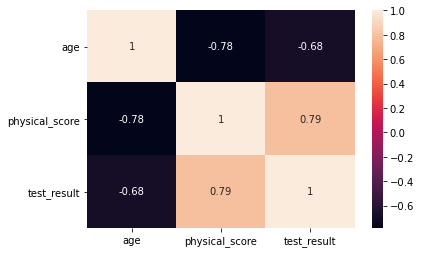

In [17]:
sns.heatmap(df.corr(), annot = True)

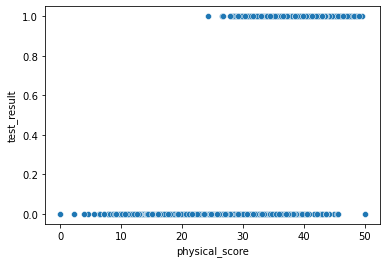

In [18]:
sns.scatterplot(x = 'physical_score', y = 'test_result', data = df)

In [19]:
# Set up X and y
X = df.drop('test_result', axis = 1)
y = df['test_result']

In [21]:
# Scale result data
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [22]:
# Create scaler object
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)

In [24]:
scaled_X_test = scaler.transform(X_test)

In [26]:
# help(LogisticRegression)

In [27]:
log_model = LogisticRegression()

In [28]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [29]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [36]:
y_pred = log_model.predict_proba(scaled_X_test)

In [37]:
y_pred

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [ ]:
## Classification Metrics

In [38]:
# Models coeff
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [39]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
y_pred = log_model.predict(scaled_X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.93

In [45]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [46]:
from sklearn.metrics import plot_confusion_matrix

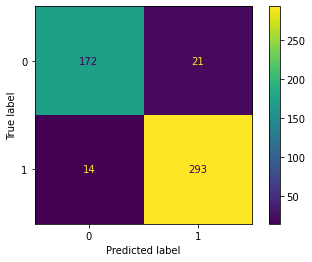

In [50]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
precision_score(y_test, y_pred)

0.9331210191082803

In [54]:
recall_score(y_test, y_pred)

0.9543973941368078

In [55]:
### Plot ROC cure

In [56]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

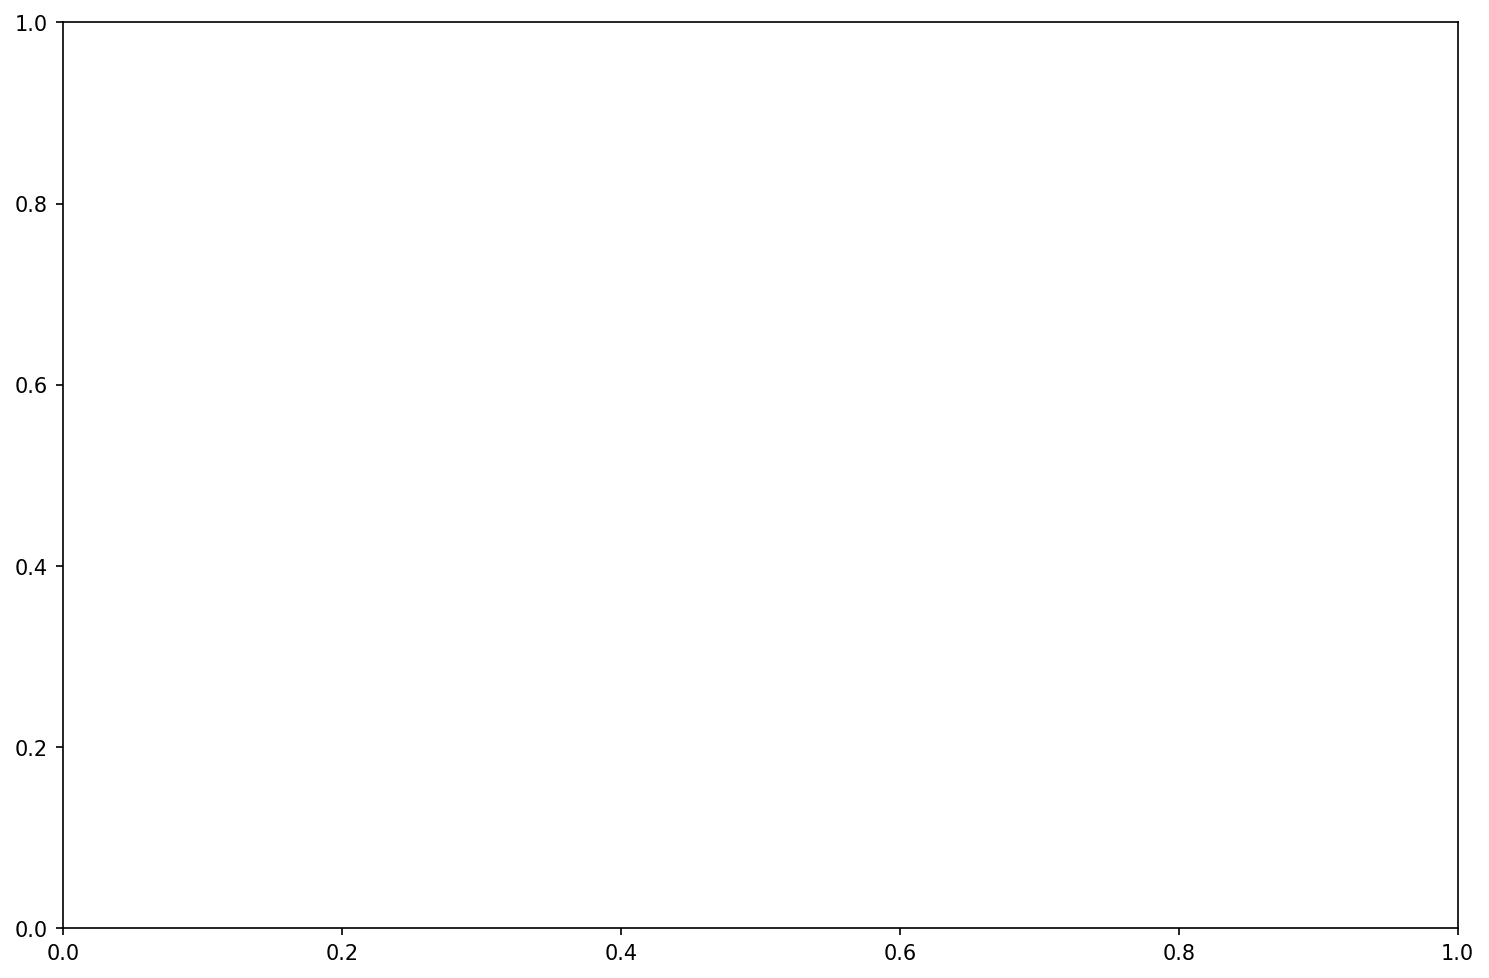

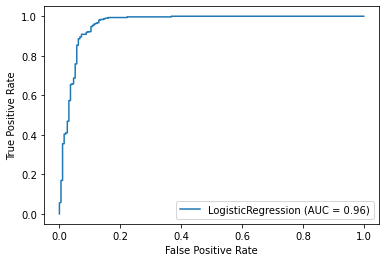

In [60]:
fig, ax = plt.subplots(figsize=(12, 8), dpi =150)
plot_roc_curve(log_model, scaled_X_test, y_test)

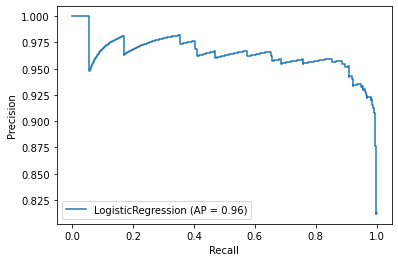

In [61]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

In [63]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [64]:
y_test[0]

1

### Multi-class Problems

In [65]:
df = pd.read_csv('./dataset/iris.csv')

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

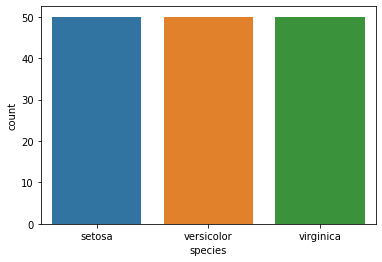

In [70]:
sns.countplot(x = 'species', data = df)

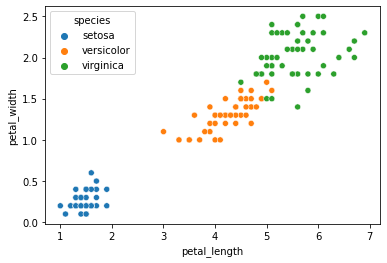

In [72]:
sns.scatterplot(x='petal_length', y = 'petal_width', hue = 'species', data = df)

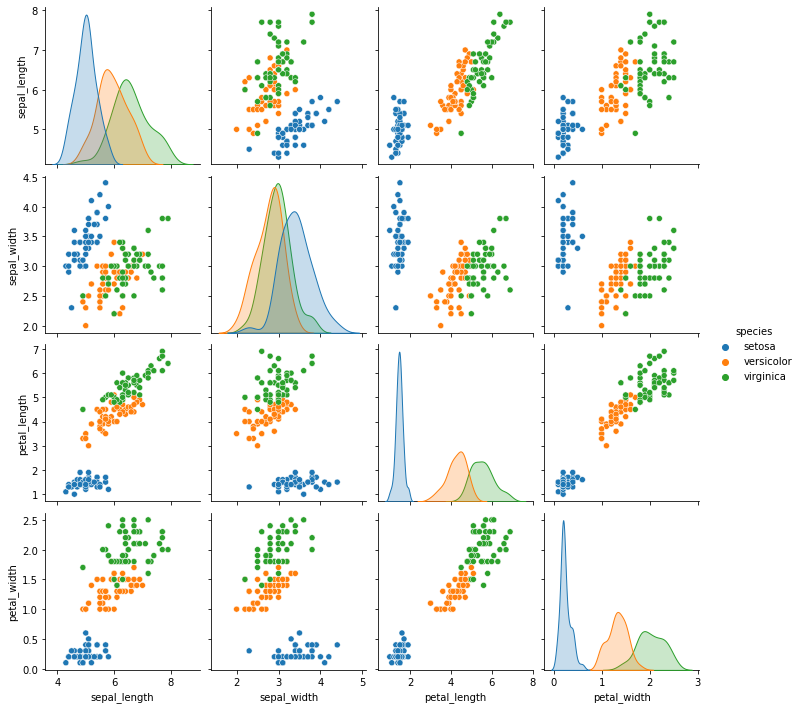

In [73]:
sns.pairplot(df, hue = 'species')

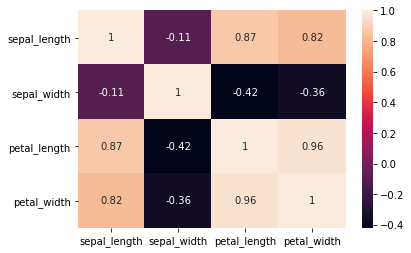

In [74]:
sns.heatmap(df.corr(), annot = True)

In [77]:
X = df.drop('species', axis = 1)
y = df['species']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [81]:
scaler = StandardScaler()

In [82]:
scaled_X_train = scaler.fit_transform(X_train)

In [83]:
scaled_X_test = scaler.transform(X_test)

In [86]:
# Baseline model
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 5000)

In [87]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {
    'penalty':penalty,
    'l1_ratio':l1_ratio,
    'C':C
}

In [88]:
grid_model = GridSearchCV(log_model, param_grid=param_grid,n_jobs = -1)

In [89]:
grid_model.fit(scaled_X_train, y_train)

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [91]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [92]:
y_pred = grid_model.predict(scaled_X_test)

In [93]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [94]:
accuracy_score(y_test, y_pred)

0.9736842105263158

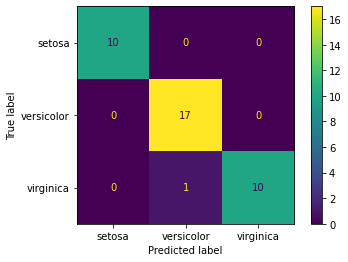

In [95]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [99]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

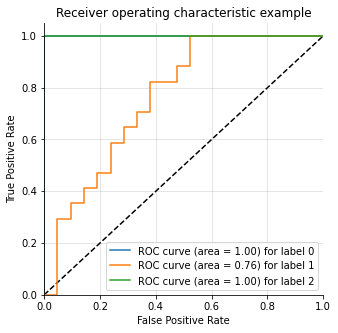

In [102]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes = 3)